## Sharpe Ration and Portfolio Values

In [3]:
!pip install quandl

  Using cached https://files.pythonhosted.org/packages/d2/cd/f04c661d1b5ba6b7d77008e8fedd28a27a683eeeffcd93c6b2dbe54ea983/inflection-0.5.0-py2.py3-none-any.whl


In [51]:
import pandas as pd
import quandl


## Create a Portfolio

In [52]:
start = pd.to_datetime('2015-01-01')
end = pd.to_datetime('2020-07-13')

In [53]:
# Grabbing a bunch of tech stocks for our portfolio
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [54]:
aapl.to_csv('AAPL_CLOSE')
cisco.to_csv('CISCO_CLOSE')
ibm.to_csv('IBM_CLOSE')
amzn.to_csv('AMZN_CLOSE')

## Normalize Prices

In [55]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [56]:
aapl.head()

,Adj. Close,Normed Return
Date,,
2015-01-02,103.863957,1.000000
2015-01-05,100.937944,0.971828
2015-01-06,100.947444,0.971920
2015-01-07,102.362951,0.985548
2015-01-08,106.295968,1.023415


In [57]:
aapl.tail()

,Adj. Close,Normed Return
Date,,
2018-03-21,171.270,1.648984
2018-03-22,168.845,1.625636
2018-03-23,164.940,1.588039
2018-03-26,172.770,1.663426
2018-03-27,168.340,1.620774


## Allocations

In [58]:
for stock_df,allo in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]):
    stock_df['Allocation'] = stock_df['Normed Return']*allo

In [59]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2015-01-02,103.863957,1.000000,0.300000
2015-01-05,100.937944,0.971828,0.291549
2015-01-06,100.947444,0.971920,0.291576
2015-01-07,102.362951,0.985548,0.295665
2015-01-08,106.295968,1.023415,0.307025


## Investment

In [60]:
for stock_df in [aapl,cisco,ibm,amzn]:
    stock_df['Position Values'] = stock_df['Allocation']*1000000

## Total Portfolio Value

In [61]:
portfolio_val = pd.concat([aapl['Position Values'],cisco['Position Values'],ibm['Position Values'],amzn['Position Values']],axis=1)

In [62]:
portfolio_val.head()

,Position Values,Position Values,Position Values,Position Values
Date,,,,
2015-01-02,300000.000000,200000.000000,400000.000000,100000.000000
2015-01-05,291548.522821,196015.936255,393706.034802,97948.269156
2015-01-06,291575.962682,195943.498732,385215.352339,95711.785298
2015-01-07,295664.501967,197754.436798,382697.766259,96726.306236
2015-01-08,307024.604409,199275.624774,391015.673207,97387.527551


In [63]:
portfolio_val.columns = ['AAPL Pos','CISCO Pos','IBM Pos','AMZN Pos']

In [64]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2015-01-02,300000.000000,200000.000000,400000.000000,100000.000000
2015-01-05,291548.522821,196015.936255,393706.034802,97948.269156
2015-01-06,291575.962682,195943.498732,385215.352339,95711.785298
2015-01-07,295664.501967,197754.436798,382697.766259,96726.306236
2015-01-08,307024.604409,199275.624774,391015.673207,97387.527551


In [65]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)

In [66]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2015-01-02,300000.000000,200000.000000,400000.000000,100000.000000,1000000.000000
2015-01-05,291548.522821,196015.936255,393706.034802,97948.269156,979218.763034
2015-01-06,291575.962682,195943.498732,385215.352339,95711.785298,968446.599050
2015-01-07,295664.501967,197754.436798,382697.766259,96726.306236,972843.011260
2015-01-08,307024.604409,199275.624774,391015.673207,97387.527551,994703.429941


In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

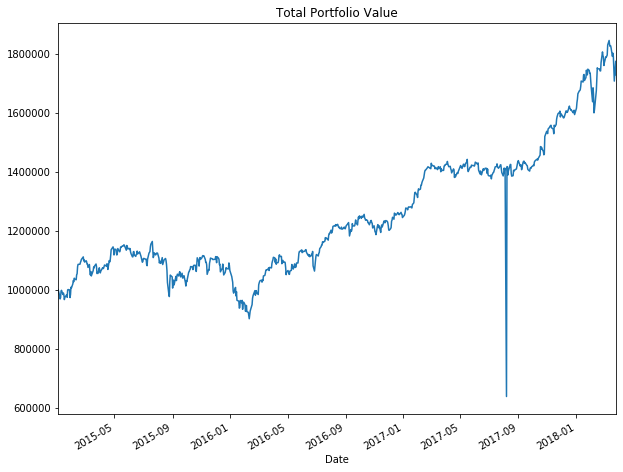

In [69]:
portfolio_val['Total Pos'].plot(figsize=(10,8))
plt.title('Total Portfolio Value')

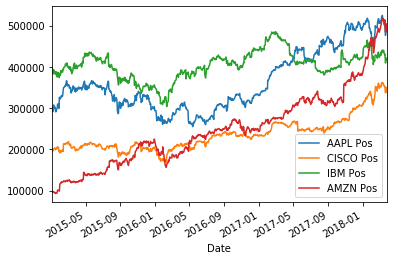

In [70]:
portfolio_val.drop('Total Pos', axis = 1).plot(kind='line')

In [71]:
portfolio_val.tail()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2018-03-21,494695.189411,352255.735949,430673.095918,512725.269026,1.790349e+06
2018-03-22,487690.834683,342397.981208,418029.683823,500486.192143,1.748605e+06
2018-03-23,476411.657275,337230.609771,409234.266713,484753.014391,1.707630e+06
2018-03-26,499027.779965,350268.285396,421547.850667,504297.938545,1.775142e+06
2018-03-27,486232.195863,339297.558346,417534.941610,485235.965253,1.728301e+06


## Portfolio Statistics

## Daily Returns 

In [72]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)